In [21]:
import pandas as pd
import numpy as np

In [22]:
gentrification = pd.read_csv('gentrification_indicator.csv')

In [23]:
gentrification.head(2)

,Unnamed: 0,X,GEO.display.label,PROP_BA_2010,PROP_BA_2011,PROP_BA_2012,PROP_BA_2013,PROP_BA_2009,PROP_MHI_2010,PROP_MHI_2011,...,PROP_MHV_2011,PROP_MHV_2012,PROP_MHV_2013,PROP_MHV_2009,PERC_MHI_2009,PERC_MHV_2009,PERC_MHV_INCREASE,PERC_BA_2013,eligable,gentrified
0,1,1,Census Tract 1,67.5,68.9,68.9,79.0,0.329765,109947,136842,...,1000000,1000000,1000000,1000000,0.938272,0.987654,0.481481,0.907407,0,0
1,2,2,Census Tract 10.01,27.5,19.2,19.2,21.6,0.266667,142697,147500,...,844400,844400,846600,817700,0.956790,0.919753,0.641975,0.512346,0,0


In [24]:
BA_2010_2013 = gentrification[['PROP_BA_2010','PROP_BA_2011','PROP_BA_2012', 'PROP_BA_2013','eligable']] 

In [25]:
BA_2010_2013 = BA_2010_2013.applymap(np.int64)

In [26]:
BA_2010_2013.to_csv('BA_2010_2013.txt', encoding='utf-8', header=False, index=False) 

In [27]:
BA_2010_2013.dtypes

PROP_BA_2010    int64
PROP_BA_2011    int64
PROP_BA_2012    int64
PROP_BA_2013    int64
eligable        int64
dtype: object

In [28]:
eligible= gentrification['eligable']

In [29]:
target = eligible.values

In [30]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1], dtype=int64)

In [31]:
numerical_features = gentrification[['PROP_BA_2010','PROP_BA_2011','PROP_BA_2012', 'PROP_BA_2013']] 

In [32]:
numerical_features.count()

PROP_BA_2010    162
PROP_BA_2011    162
PROP_BA_2012    162
PROP_BA_2013    162
dtype: int64

In [33]:
features_array = numerical_features.values

In [36]:
features_array[2]

array([ 35.8,  32.9,  32.9,  15.2])

In [37]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [39]:
target_predicted = logreg.predict(features_test)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.87878787878787878

In [41]:
logreg.score(features_test, target_test)

0.87878787878787878

In [42]:
feature_names = numerical_features.columns
feature_names

Index(['PROP_BA_2010', 'PROP_BA_2011', 'PROP_BA_2012', 'PROP_BA_2013'], dtype='object')

In [44]:
#weights
logreg.coef_

array([[-0.05570049,  0.0040007 ,  0.0040007 , -0.1233135 ]])

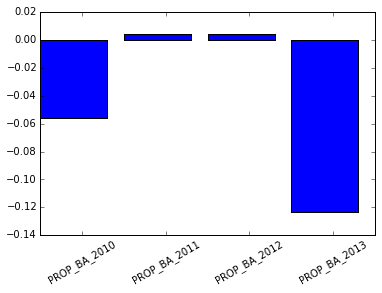

In [46]:
%matplotlib inline 
import matplotlib.pyplot as plt

x = np.arange(len(feature_names))
plt.bar(x, logreg.coef_.ravel())
plt.xticks(x + 0.5, feature_names, rotation=30);

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[21  0]
 [ 4  8]]


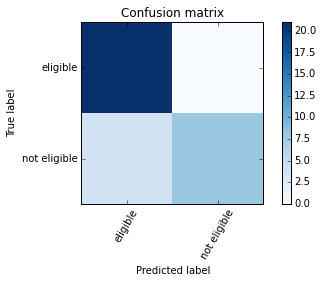

In [49]:
def plot_confusion(cm, target_names = ['eligible', 'not eligible'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)

In [50]:
print(cm)

[[21  0]
 [ 4  8]]


In [51]:
cm.sum(axis=1)

array([21, 12])

In [52]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[ 1.          0.        ]
 [ 0.33333333  0.66666667]]


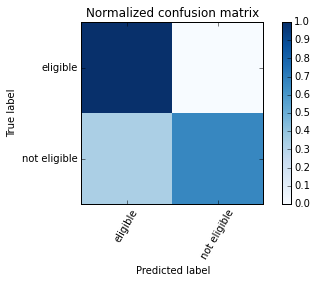

In [53]:
plot_confusion(cm_normalized, title="Normalized confusion matrix")

In [54]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                            target_names=['eligible', 'not eligible']))

              precision    recall  f1-score   support

    eligible       0.84      1.00      0.91        21
not eligible       1.00      0.67      0.80        12

 avg / total       0.90      0.88      0.87        33



In [55]:
target_predicted_prob = logreg.predict_proba(features_test)

In [56]:
#By default the decision threshold is 0.5: if we vary the decision threshold from 0 to 1 we could generate a
#family of binary classifier models that address all the possible trade offs between false positive and 
#false negative prediction errors.
target_predicted_prob[:5]

array([[  9.99958332e-01,   4.16679951e-05],
       [  4.57198121e-01,   5.42801879e-01],
       [  7.63756719e-01,   2.36243281e-01],
       [  9.99395743e-01,   6.04256947e-04],
       [  8.90116146e-01,   1.09883854e-01]])

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

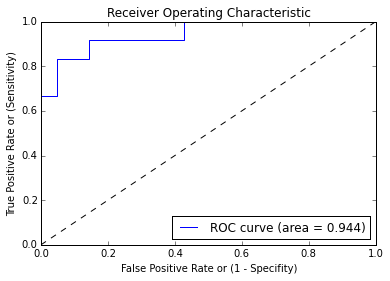

In [58]:
plot_roc_curve(target_test,target_predicted_prob)

In [59]:
# Here the area under ROC curve is 0.944 which is 
# similar to the accuracy (0.0.878). However the ROC-AUC score of a random model is expected to 0.5 on
# average while the accuracy score of a random model depends on the class imbalance of the data. ROC-AUC can be seen as a
# way to callibrate the predictive accuracy of a model against class imbalance.

In [60]:
# We previously decided to randomly split the data to evaluate the model on 20% of held-out data. 
# However the location randomness of the split might have a significant impact in the estimated accuracy

In [70]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=5)

In [71]:
# Instead of using a single train / test split, we can use a group of them and compute the min, max and mean scores as 
# an estimation of the real test score while not underestimating the variability:
scores

array([ 0.84848485,  0.93939394,  0.81818182,  0.90625   ,  0.67741935])

In [64]:
scores.min(), scores.max(), scores.mean()

(0.67741935483870963, 0.93939393939393945, 0.83794599217986332)

In [67]:
scores = cross_val_score(logreg, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.83388157894736847, 0.91392543859649134, 0.95723684210526316)